### Classificação Floresta aleatória - Random Forest

In [1]:
# install.packages("randomForest", dependencies=T)
library(randomForest)

randomForest 4.6-14

Type rfNews() to see new features/changes/bug fixes.



In [2]:
credito = read.csv(file.choose(), sep=",", header=T) # credit.csv
amostra = sample(2, 1000, replace=T, prob=c(0.7,0.3))
creditotreino = credito[amostra==1,]
creditoteste = credito[amostra==2,]

In [3]:
floresta = randomForest(class ~ . , data=creditotreino, ntree=100, importance=T)
floresta


Call:
 randomForest(formula = class ~ ., data = creditotreino, ntree = 100,      importance = T) 
               Type of random forest: classification
                     Number of trees: 100
No. of variables tried at each split: 4

        OOB estimate of  error rate: 25.48%
Confusion matrix:
     bad good class.error
bad   90  135  0.60000000
good  49  448  0.09859155

In [4]:
summary(floresta)

                Length Class  Mode     
call               5   -none- call     
type               1   -none- character
predicted        722   factor numeric  
err.rate         300   -none- numeric  
confusion          6   -none- numeric  
votes           1444   matrix numeric  
oob.times        722   -none- numeric  
classes            2   -none- character
importance        80   -none- numeric  
importanceSD      60   -none- numeric  
localImportance    0   -none- NULL     
proximity          0   -none- NULL     
ntree              1   -none- numeric  
mtry               1   -none- numeric  
forest            14   -none- list     
y                722   factor numeric  
test               0   -none- NULL     
inbag              0   -none- NULL     
terms              3   terms  call     

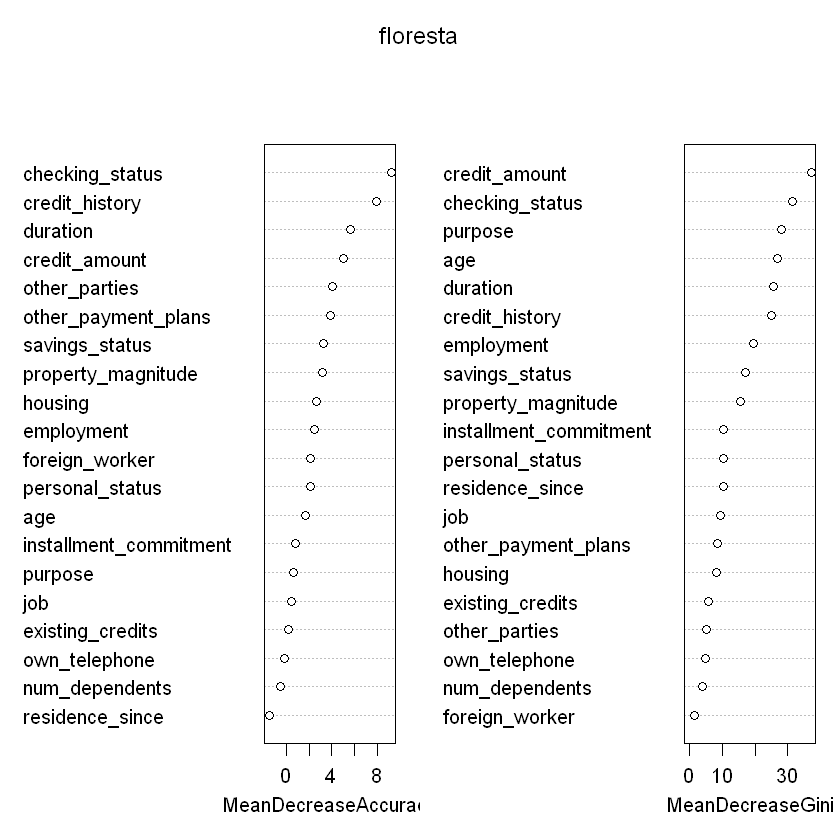

In [5]:
varImpPlot(floresta)

In [6]:
previsao = predict(floresta, creditoteste)

In [7]:
confusao = table(previsao, creditoteste$class)
confusao

        
previsao bad good
    bad   34   19
    good  41  184

In [8]:
taxaacerto = (confusao[1] + confusao[4]) / sum(confusao)
taxaacerto

[1] 0.7841727

In [9]:
taxaerro = 1 - taxaacerto
taxaerro

[1] 0.2158273